# Understanding Fits Files

The general format for opening a FITS file is still the same as other files like .txt and .csv files bit the idffeence between those and FITS files is that FITS files have their own file structure that can make them a bit more tasking to learn but hopefully at the end of this notebook you will be able to know what a FITS file is and how to comfortably navigate the contents of a FITS file so that you can perform your own Astronomical research or Hobby!!

## FITS Format

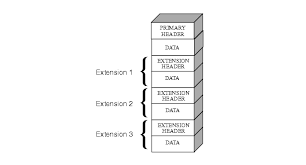

The above image shows the basic structure for a fits file. Fits files will always have a primary header which may or may not contain data. Then, for very large FITS file, they may have an extension which may store images, a table full of information, or spectroscopic data. 

# How to access FITS File

We will use the astropy package which can be installed on your computer using:

pip install astropy

Or if you have Anaconda installed:

conda install astropy

Once you have this installed we will go to their io library and select the package fits

In [ ]:
#Importing the necessary package to read in FITS files
from astropy.io import fits

# 1. Opening the File

In [ ]:
hdu = fits.open('ud1_01.Y.7673.ell.1d.fits')

This command returns to us an object that allows us to explore a quick summary of the FITS file called an HDU (Header-Data Unit).

To get some quick summary information about the file we can use the $\textbf{.info()}$ command to give us a run down as to what is inside the FITS file

In [ ]:
hdu.info()

We can see that this particular FITS file has 6 extensions with the type of data contained in those extensions. 

In this case the type of data stored is an $\textbf{ImageHDU}$ which can be a 1D or 2D array depending on what kind of data is stored on in the FITS file. We can Figure out which one this is by looking at another column called $\textbf{Dimensions}$ whcih tells you the dimensions of the data. Since we only see one number this indicates to us that this is a 1D array of length 1591. 

---

Once we know how many extensions there are we can then go to each extension and see what information is provided in the header of the extension we are interested.

We simply tell the hdu which extension we are interested in with:

    0 - Primary
    1 - Extension 1
    2 - Extension 2
    :
    :
    
Then use the $\textbf{.header}$ command to pull up the header information for the given extension

In [ ]:
#Primary Header information
hdu[0].header

Now looking at this it looks like a weird table with random names and number but as with other files we are usually given pieces of information that allows us to interpret the numbers here. The background for this file is that this is a fits file of an extracted spectra.

Thus, this information allows us to make sense of the $\textbf{COMMENT}$ in the header where the $\textbf{COMMENT}$ tells us what is stored in each extension. We see that Extension 1 has the optimal extraction (spectra), Extension 2 has the error bars of the optimal extracted spectrum and so on. 

CRVAL tells you what the first element in wavelength space this spectra is on and the CDELT tells you the spacing to the next wavelength, thus this gives you a way to create a wavelength array to plot against this spectra using:

    wavelength = CRVAL1 + CDELT1 * np.arange(0, len(spectra))
    
And then the rest is just information about the night they took the spectra which you can browse through at your leisure. 

---

## Lets try to get that spectrum and see how it looks like

To get data from any extension we simply type into python the extension we wish to get the data from and write $\textbf{.data}$ and fits will give it to us in the format that it was presented in the $\textbf{.info}$ table

In [ ]:
getting_spectrum = hdu[1].data

In [ ]:
len(getting_spectrum)

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
%matplotlib inline
plt.figure(figsize = (12, 7))
plt.plot(getting_spectrum)
plt.show()

# Lets make that wavelength array

One thing that I forgot to mention is that the header acts like a lookup table so you can actually get the value of the corresponding row by typing the row name into the header. 

In [ ]:
primary_header = hdu[0].header

In [ ]:
import numpy as np

In [ ]:
wavelength = primary_header['CRVAL1'] + primary_header['CDELT1'] * np.arange(0, len(getting_spectrum))

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(wavelength, getting_spectrum)
plt.show()

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(wavelength, getting_spectrum)
plt.ylim(-1e-17, 1e-17)
plt.show()

# Try this out!!

One thing to note is that this next file has no extensions when you do the $\textbf{.info}$ this means that the data is stored in Primary. 

The goal of this excercise is to use everything here to plot a really cool image of a galaxy. I will provide you with the plotting code all you need to do is get the data from the FITS file.

In [ ]:
hdu_image = fits.open('m101_optical.fits')

In [ ]:
#once you found the image set it equal to this variable
Image = 

In [ ]:
plt.figure(figsize = (12, 12))
plt.imshow(Image, cmap = 'gray')
plt.show()